# Loan Prediction 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Lets load our dataset

In [18]:
data = pd.read_csv("C:/Users/Archana/Documents/Business Analytics/Python/Loan Prediction/Train.csv")

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Lets inspect the data

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


#### So we have some missing data here

In [6]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
data.shape

(614, 13)

#### The dataset contains 13 fields and 614 records

In [19]:
data['Credit_History'] = data['Credit_History']. astype('O')

In [20]:
data.describe(include='O')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,564.0,614,614
unique,614,2,2,4,2,2,2.0,3,2
top,LP001280,Male,Yes,0,Graduate,No,1.0,Semiurban,Y
freq,1,489,398,345,480,500,475.0,233,422


In [21]:
## Will drop the Loan_ID column as it is not of much use for the analysis

data.drop('Loan_ID', axis = 1, inplace = True)

In [22]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1,Urban,Y


In [23]:
## Check for any duplicate rows

data.duplicated().any()

False

#### No duplicate rows

The percentage of Y class : 0.69
The percentage of N class : 0.31


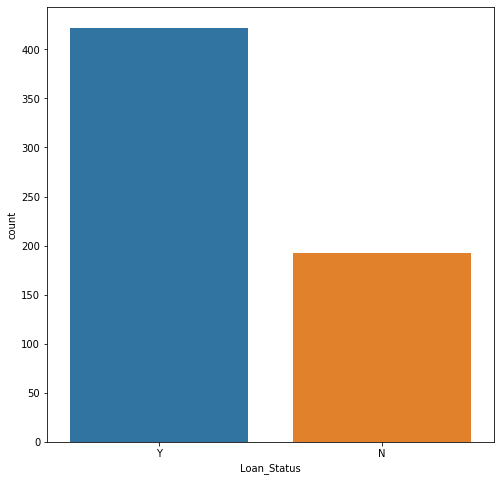

In [26]:
plt.figure(figsize = (8,8))
sns.countplot(data['Loan_Status'])

print('The percentage of Y class : %.2f' % (data['Loan_Status'].value_counts()[0] / len(data)))
print('The percentage of N class : %.2f' % (data['Loan_Status'].value_counts()[1] / len(data)))


### Now lets look deeper into the data for each category 

C:\Users\Archana\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Archana\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


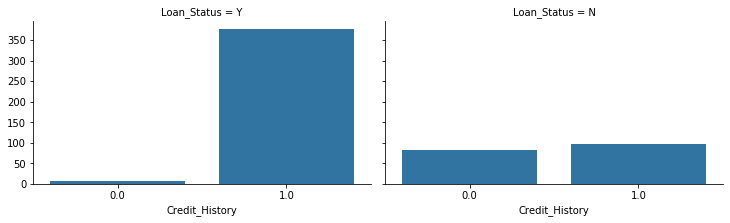

In [27]:
grid = sns.FacetGrid(data,col='Loan_Status', size=3.2, aspect=1.6)
grid.map(sns.countplot, 'Credit_History');

#### We can see that most of the loans are approved for people with a credit history. So, we can consider credit history to be a good feature for further analysis. 

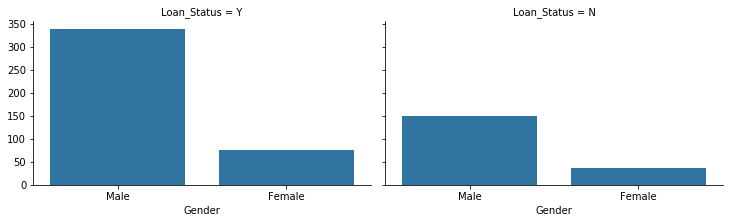

In [29]:
grid = sns.FacetGrid(data,col='Loan_Status', size=3.2, aspect=1.6)
grid.map(sns.countplot, 'Gender');

#### Gender does not tell much about the loan status approval. So, this cannot be considered as a good feature.

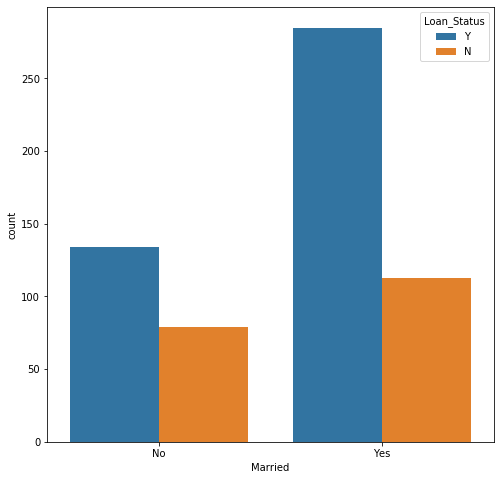

In [34]:
plt.figure(figsize = (8,8))
sns.countplot(x = 'Married', hue = 'Loan_Status', data = data)

#### Looks like married people are more likely to get a loan

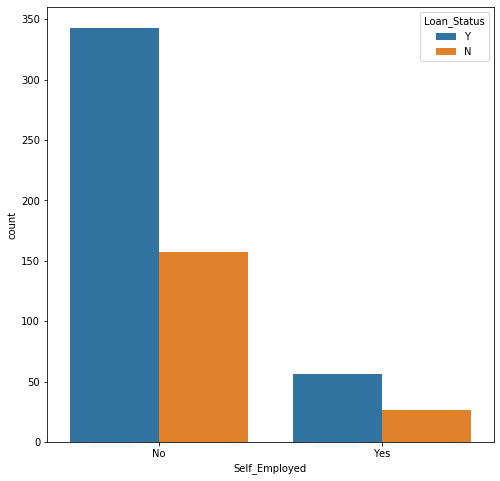

In [35]:
plt.figure(figsize= (8,8))
sns.countplot(x = 'Self_Employed', hue = 'Loan_Status', data = data)

#### Self-employed are more likely  to get the approval. Therefore a good feature

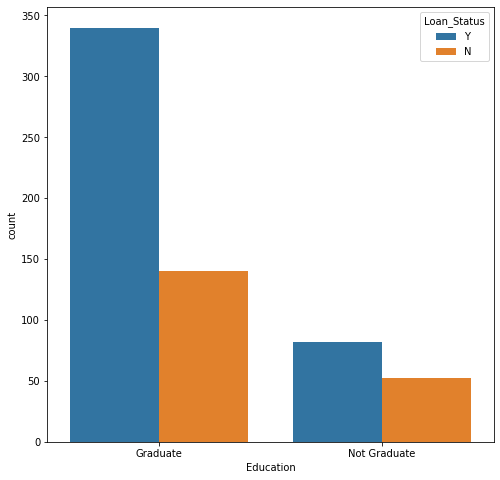

In [36]:
plt.figure(figsize = (8,8))
sns.countplot(x = 'Education', hue = 'Loan_Status', data = data)

#### Doesnt look like a good feature

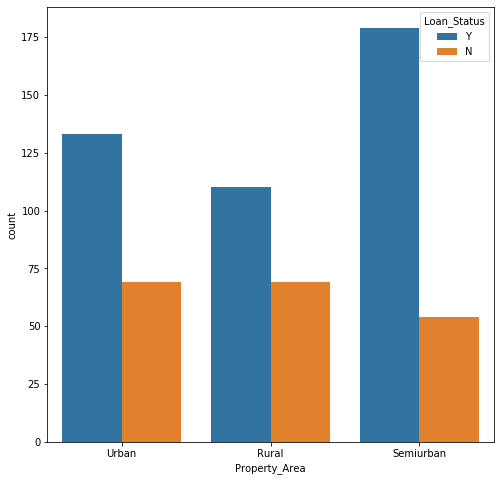

In [38]:
plt.figure(figsize = (8,8))
sns.countplot(x = 'Property_Area', hue = 'Loan_Status', data = data)

#### We can see that people in Semiurban are more likely to get the approval. Good feature


### Now lets check for missing values in the data

In [44]:
data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

#### We can see that we pur data contains few null values. Lets see how to handle these null values

In [76]:
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].mean())
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].median())

#### Drop other na values

In [77]:
data.dropna(inplace = True)

In [78]:
data.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [82]:
## Convert Loan Status(Traget variable) into 0 and 1)

data['Loan_Status'].replace('N', 0, inplace = True)
data['Loan_Status'].replace('Y', 1, inplace = True)

#### So finally we do not have any missing values in our dataset

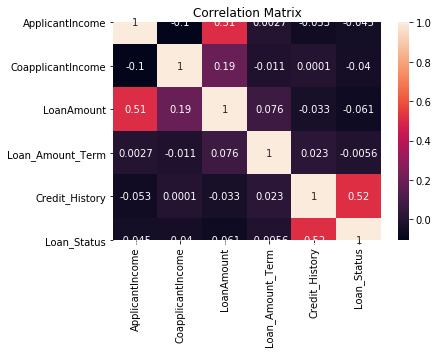

In [83]:
plt.title('Correlation Matrix')
sns.heatmap(data.corr(),annot=True)

#### We can see that Credit Score is only related to Loan Status, so we can drop all other variables

In [86]:
del data['ApplicantIncome']
del data['CoapplicantIncome']
del data['Loan_Amount_Term']


In [87]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,1.0,Urban,1
1,Male,Yes,1,Graduate,No,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,1.0,Urban,1
4,Male,No,0,Graduate,No,1.0,Urban,1


#### Lets change categorical variable to continous 

In [88]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [90]:
label = LabelEncoder()
hot = OneHotEncoder()

In [92]:
data['Property_Area']=label.fit_transform(data['Property_Area'])
data['Dependents']=label.fit_transform(data['Dependents'])
data=pd.get_dummies(data)

In [93]:
data.head()

,Dependents,Credit_History,Property_Area,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes
0,0,1.0,2,1,0,1,1,0,1,0,1,0
1,1,1.0,0,0,0,1,0,1,1,0,1,0
2,0,1.0,2,1,0,1,0,1,1,0,0,1
3,0,1.0,2,1,0,1,0,1,0,1,1,0
4,0,1.0,2,1,0,1,1,0,1,0,1,0


In [96]:
## Lets drop the columns not required

del data['Gender_Female']
del data['Married_No']
del data['Education_Not Graduate']
del data['Self_Employed_No']

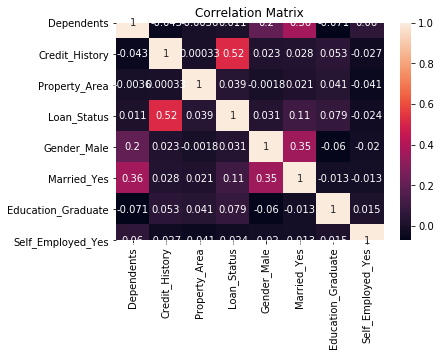

In [97]:
plt.title("Correlation Matrix")
sns.heatmap(data.corr(), annot = True)

#### Loan Status is least correlated with Dependents, Self employed, Eduaction

In [98]:
del data['Dependents']
del data['Self_Employed_Yes']
del data['Education_Graduate']

In [99]:
data.head()

,Credit_History,Property_Area,Loan_Status,Gender_Male,Married_Yes
0,1.0,2,1,1,0
1,1.0,0,0,1,1
2,1.0,2,1,1,1
3,1.0,2,1,1,1
4,1.0,2,1,1,0


In [100]:
X = data.drop('Loan_Status',1)

In [101]:
Y = data['Loan_Status']

#### Lets split the data into train and test

In [104]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 123)

In [107]:
print("Shape of X_train is:", x_train.shape)
print("Shape of X_test is :", x_test.shape)
print("Shape of Y_train is:", y_train.shape)
print("Shape of Y_test is:" ,y_test.shape)

Shape of X_train is: (433, 4)
Shape of X_test is : (109, 4)
Shape of Y_train is: (433,)
Shape of Y_test is: (109,)


#### Lets try Logistic Regression

In [109]:
from sklearn.linear_model import LinearRegression
log = LinearRegression()

In [111]:
log.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [112]:
log.score(x_train, y_train)

0.2635891174245141

In [114]:
pred=log.predict(x_test)
pred

array([0.75072092, 0.74855664, 0.82177655, 0.84092401, 0.81961227,
       0.80262909, 0.72940918, 0.14624263, 0.71026172, 0.80262909,
       0.75072092, 0.84092401, 0.74855664, 0.74855664, 0.84092401,
       0.80262909, 0.80262909, 0.80262909, 0.84092401, 0.81961227,
       0.84092401, 0.05387526, 0.07302272, 0.71242601, 0.81961227,
       0.73157347, 0.80262909, 0.80262909, 0.80262909, 0.84092401,
       0.075187  , 0.71242601, 0.84092401, 0.84092401, 0.84092401,
       0.16539009, 0.82177655, 0.075187  , 0.80262909, 0.82177655,
       0.84092401, 0.73157347, 0.82177655, 0.72940918, 0.81961227,
       0.84092401, 0.80262909, 0.84092401, 0.82177655, 0.82177655,
       0.80262909, 0.82177655, 0.80262909, 0.75072092, 0.80262909,
       0.75072092, 0.80262909, 0.71242601, 0.72940918, 0.12709517,
       0.75072092, 0.82177655, 0.84092401, 0.075187  , 0.80262909,
       0.73157347, 0.80262909, 0.71242601, 0.12493089, 0.73157347,
       0.75072092, 0.84092401, 0.80046481, 0.82177655, 0.74855

In [118]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()

In [119]:
clf.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [120]:
clf.score(x_train,y_train)

0.8036951501154734

In [121]:
pred1=clf.predict(x_test)

In [122]:
accuracy_score(y_test,pred1)

0.8073394495412844

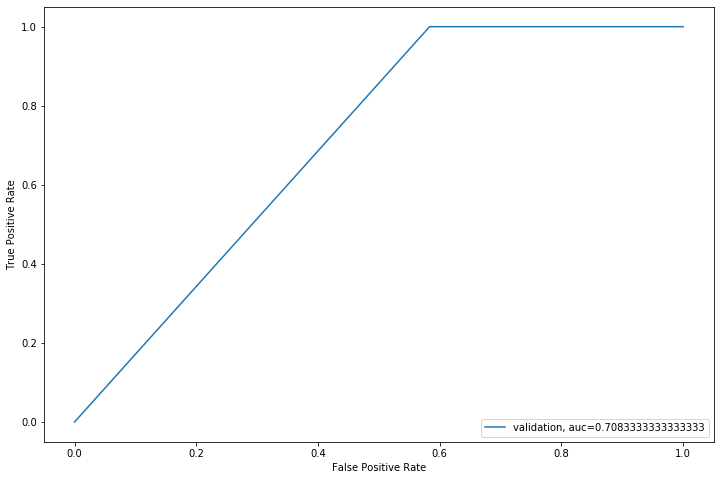

In [124]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(y_test,  pred1)
auc = metrics.roc_auc_score(y_test, pred1)
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="validation, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

#### We can see that Decision Tree Classifier is giving us accuracy of 80% which is pretty good score. Therefore, we can conclude saying that this is the best model for our dataset 

# END OF PROJECT